# **Introduction**

Bellabeat is health focused products manufacturer mainly focused on women fitness. It was founded by Urška Sršen and Sando Mur in 2014. This case study focused on analysing the data following the steps of the data analysis process: ask, prepare, analyze, share and act. Main aim of analysis is to gain the insights into how customers are using the smart devices to help company to guide marketing strategy.

# Ask

**Business task**
  
 * To analyse the trends of usage of smart device by customers and,
 * How could these trends help influence Bellabeat marketing strategy ?
    
**Stakeholders**
    
 * Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
 * Sando Mur: Mathematician and Bellabeat’s cofounder
 * Bellabeat marketing analytics team: A team of data analysts responsible for collecting analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.

# Prepare

**Data Source**

Dataset that has been used for the case study is publically available on kaggle data set in name FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius).

**Data structure and organisation**

The datset have total of 11 csv files (Folder: Fitbase Data 3.12.16 - 4.11.16). All the files have been downloaded and viewed in Ms excel for a quick review.
The dataset consist of data from thirty fitbit users and contain their personal tracker data, like heart rate, sleep monitoring, hourly step count, weight,and calories. This information will be used by me to explore the user's habits.

**Sort and filter the data**
For the study I am going to use the **daily activity** , **hourly Intensities**, **sleep** data.

Lets process our data for further analysis.

# Process

In [1]:
# Processing the data for analysis
# Importing the required libaray

library(tidyverse) 
library(lubridate)
library(janitor)
library(dplyr)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [2]:
# importing the datasets
activity_df <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep_df <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
intensity_df<- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")

In [3]:
# perview of the datasets
head(activity_df)
head(sleep_df)
head(intensity_df)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


# Cleaning


In [4]:
# first I will see if the data entered are in correct format or structures
str(activity_df)
str(sleep_df)
str(intensity_df)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

**some inconsistencies are obsereved hence treating accordingly**


In [5]:
# checking for distinct values
n_distinct(activity_df$id)
n_distinct(sleep_df$id)
n_distinct(intensity_df$id)



[1] 0

[1] 0

[1] 0

In [6]:
# checking for duplicate values

sum(duplicated(activity_df))
sum(duplicated(sleep_df))
sum(duplicated(intensity_df))

[1] 0

[1] 3

[1] 0

In [7]:
# removing all the duplicate values form our data

# sleep data has total 413 observation, so can remove duplicates

sleep_df <- sleep_df %>%
distinct() %>%
drop_na()

In [8]:
# confirmation to know the number of duplicates
sum(duplicated(sleep_df))

[1] 0

In [9]:
# conveting the columns names in standarize formate
clean_names(activity_df)
activity_df <- rename_with(activity_df, tolower)
clean_names(sleep_df)
sleep_df <- rename_with(sleep_df, tolower)
clean_names(intensity_df)
intensity_df<-rename_with(intensity_df, tolower)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,4/18/2016,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,4/20/2016,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<int>,<int>,<int>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320
1503960366,4/20/2016 12:00:00 AM,1,360,377
1503960366,4/21/2016 12:00:00 AM,1,325,364
1503960366,4/23/2016 12:00:00 AM,1,361,384


id,activity_hour,total_intensity,average_intensity
<dbl>,<chr>,<int>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000
1503960366,4/12/2016 6:00:00 AM,0,0.000000
1503960366,4/12/2016 7:00:00 AM,0,0.000000
1503960366,4/12/2016 8:00:00 AM,13,0.216667


In [10]:
# renaming the column name and formating the column
activity_df<- activity_df %>%
  rename(date = activitydate) %>%
  mutate(date = as_date(date, format = "%m/%d/%Y"))

sleep_df<- sleep_df %>%
  rename(date = sleepday) %>%
  mutate(date = as_date(date, format = "%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone() ))



Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `date = as_date(date, format = "%m/%d/%Y %I:%M:%S %p", tz =
  Sys.timezone())`.
Caused by warning:
! `tz` argument is ignored by `as_date()`”


In [11]:
intensity_df$activityhour=as.POSIXct(intensity_df$activityhour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
intensity_df$time <- format(intensity_df$activityhour, format = "%H:%M:%S")
intensity_df$date <- format(intensity_df$activityhour, format = "%m/%d/%y")

In [12]:
# converting the type of date column
intensity_df$date <- as.Date(intensity_df$date, format="%m/%d/%y")

# Converting the type of time column
intensity_df$time <- as.POSIXct(intensity_df$time, format="%H:%M:%S")


In [13]:
head(activity_df)
head(sleep_df)
head(intensity_df)

,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,id,date,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<date>,<int>,<int>,<int>
1,1503960366,2016-04-12,1,327,346
2,1503960366,2016-04-13,2,384,407
3,1503960366,2016-04-15,1,412,442
4,1503960366,2016-04-16,2,340,367
5,1503960366,2016-04-17,1,700,712
6,1503960366,2016-04-19,1,304,320


,id,activityhour,totalintensity,averageintensity,time,date
,<dbl>,<dttm>,<int>,<dbl>,<dttm>,<date>
1,1503960366,2016-04-12 00:00:00,20,0.333333,2025-05-13 00:00:00,2016-04-12
2,1503960366,2016-04-12 01:00:00,8,0.133333,2025-05-13 01:00:00,2016-04-12
3,1503960366,2016-04-12 02:00:00,7,0.116667,2025-05-13 02:00:00,2016-04-12
4,1503960366,2016-04-12 03:00:00,0,0.000000,2025-05-13 03:00:00,2016-04-12
5,1503960366,2016-04-12 04:00:00,0,0.000000,2025-05-13 04:00:00,2016-04-12
6,1503960366,2016-04-12 05:00:00,0,0.000000,2025-05-13 05:00:00,2016-04-12


In [14]:
# Now we merge acitivty and sleep, both the tables
daily_activity <- merge(activity_df, sleep_df, by=c("id","date"))
glimpse(daily_activity)

Rows: 410
Columns: 18
$ id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ date                     <date> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-…
$ totalsteps               <int> 13162, 10735, 9762, 12669, 9705, 15506, 10544…
$ totaldistance            <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ trackerdistance          <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ loggedactivitiesdistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ veryactivedistance       <dbl> 1.88, 1.57, 2.14, 2.71, 3.19, 3.53, 1.96, 1.3…
$ moderatelyactivedistance <dbl> 0.55, 0.69, 1.26, 0.41, 0.78, 1.32, 0.48, 0.3…
$ lightactivedistance      <dbl> 6.06, 4.71, 2.83, 5.04, 2.51, 5.03, 4.24, 4.6…
$ sedentaryactivedistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ veryactiveminutes        <int> 25, 21, 29, 36, 38, 50, 28, 19, 41, 39, 73, 3…
$ fairlyactiveminutes      <int> 13, 19, 34, 10, 20, 31, 12, 8, 21, 5, 14, 23,…
$ lightlyactivemin

# Analyse


In [15]:
daily_activity %>%
 select(totalsteps,
       totaldistance,
       totalminutesasleep,
       sedentaryminutes, calories) %>%
summary()

   totalsteps    totaldistance    totalminutesasleep sedentaryminutes
 Min.   :   17   Min.   : 0.010   Min.   : 58.0      Min.   :   0.0  
 1st Qu.: 5189   1st Qu.: 3.592   1st Qu.:361.0      1st Qu.: 631.2  
 Median : 8913   Median : 6.270   Median :432.5      Median : 717.0  
 Mean   : 8515   Mean   : 6.012   Mean   :419.2      Mean   : 712.1  
 3rd Qu.:11370   3rd Qu.: 8.005   3rd Qu.:490.0      3rd Qu.: 782.8  
 Max.   :22770   Max.   :17.540   Max.   :796.0      Max.   :1265.0  
    calories   
 Min.   : 257  
 1st Qu.:1841  
 Median :2207  
 Mean   :2389  
 3rd Qu.:2920  
 Max.   :4900  

 **key points to focused**
 
* According to the article the approximate 10,000 steps is considered being active. [Article: https://iris.who.int/bitstream/handle/10665/207007/9789290613947_eng.pdf]The average steps perday is 8515 steps, which is fine. So we can say that most of them are failry active.
  
* On average participants sleep 419 minutes~ 6.9 hours.
  
* Average sedentary time of participants is 712 minutes ~ 11.9 hours, which falls under high risk and needs to be reduced. The sedentary lifestyle affects health in many ways. Sedentary lifestyles increase all causes of mortality, double the risk of cardiovascular diseases, diabetes, and obesity, and increase the risks of colon cancer, high blood pressure, osteoporosis, lipid disorders, depression and anxiety(Source: https://www.who.int/news/item/04-04-2002-physical-inactivity-a-leading-cause-of-disease-and-disability-warns-who).





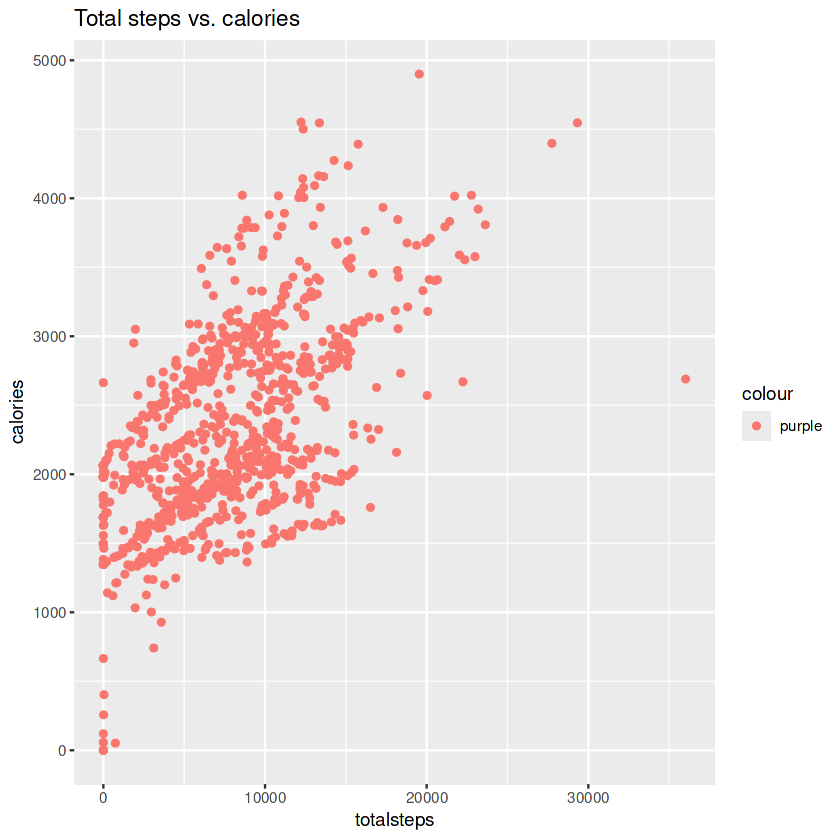

In [16]:
# Visualization
ggplot(data = activity_df)+
  geom_point(mapping = aes(x = totalsteps, y = calories, color = "purple" ))+ 
  labs(title = "Total steps vs. calories")

With the help of above graph we can see the positive correlation between number of steps and calories.

In [17]:
activity_df <- mutate(activity_df, totalactivityminutes = veryactiveminutes+fairlyactiveminutes+lightlyactiveminutes)


$title
[1] "Total activity vs calorie"

attr(,"class")
[1] "labels"

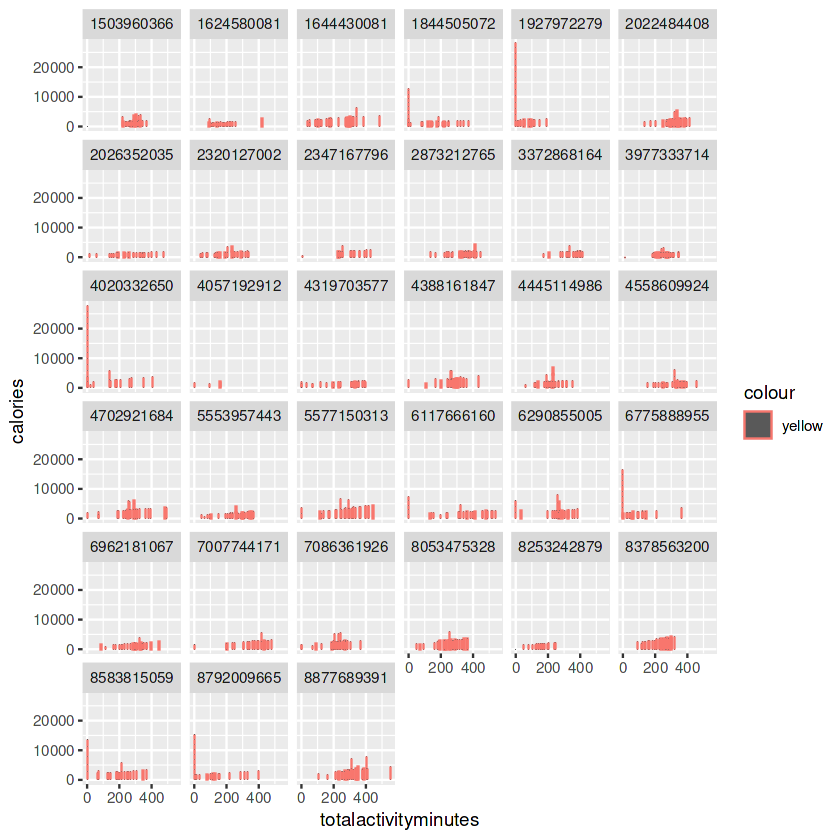

In [18]:
ggplot(data = activity_df)+
   geom_col(mapping = aes(x=totalactivityminutes, y = calories, color= "yellow"))+
   facet_wrap(~id)
   labs(title = "Total activity vs calorie")

From the above we can say that the calorie burnt is not always proportional to the activity level as most of them is lighlty active more than very or fairly active. Hence we can add the notification whenever sensor observe light activity.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


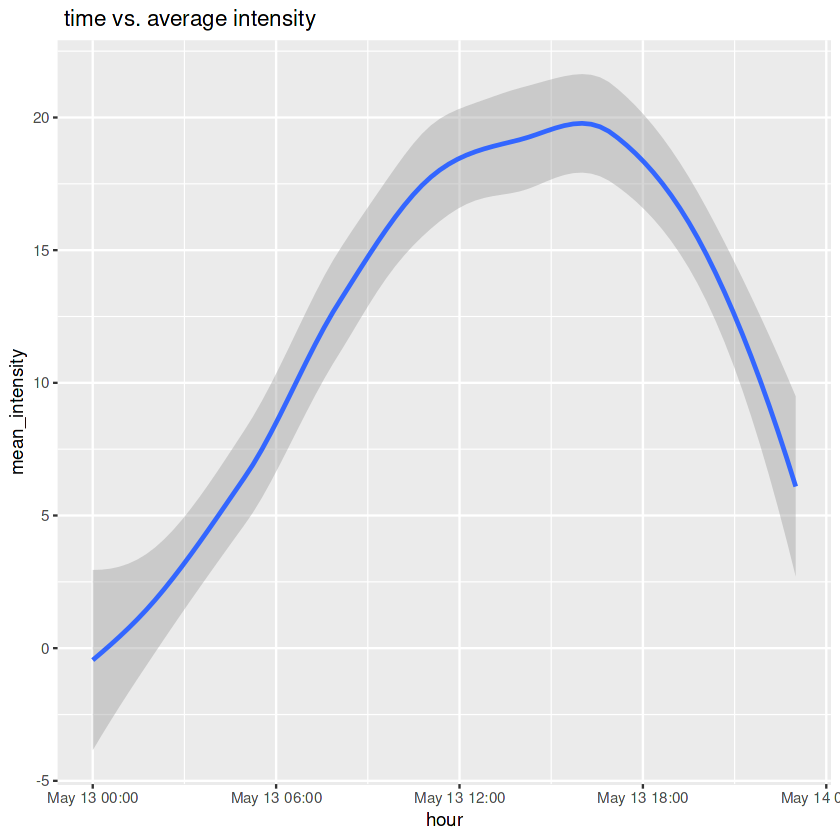

In [19]:
# Group by hour
intensity_df <- intensity_df %>%
  mutate(hour = floor_date(time, "hour")) %>%
  group_by(hour) %>%
  summarize(mean_intensity = mean(totalintensity))

ggplot(data = intensity_df)+
  geom_smooth(mapping = aes(x = hour, y = mean_intensity))+ 
  labs(title = " time vs. average intensity")

From the above plot we can say that the users are mostly active at noon from 4 pm - 6 pm. I suppose because most of the people are done with their working hours.

# Act

After analyzing the FitBit Fitness Tracker Data, I can give the following recommendation to bellabeat marketing strategy.

The bellabeat fitness tracker should act as a guide more than the tracker. It should motivate and encourage users to focuse on their health.

Key recommendations

* Average steps count of participants are 8515 per day, so to improve it, team can add a rewards system on daily and monthly basis. Which can motivate people be more active and to complete required number of steps on daily basis.
  
  **[Note: The rewards can be redeemed to buy other bellabeat products online.]**
  
* The calories burnt doesnot shows a positive correlation with total activity, so can imply that most of the users are not able to tract their activity's intensity. So bellabeat can give an alarm when no activity get noticed for longer periods.

* On observing sedantary hour ~ 11.9 hour, which is very dangerous. The more inactivity lead difficulty in sleeping, and also can lead to serious health hazards. So can notify people about the health benefits of being a active person. Can run campaing like **[More activity ~ Good sleep ~ Good Health]** to make people more informed.

* Most of the users are observed to choose 4 - 6pm as activity. So bellabeat can notify them in same period.

* Personal input: If want to increase the users count to use the bellabeat product. They can provide a personalised routine accoring to their daily routine. Also add suggestions about healthy eating and reducing sedantary hour slowly, by slowly increasing motivation for activity.

This is my first case study using R. I would appreciate any recommendations for improvement.

Thank you so much for showing the interest to my case study.
